## SVM示例

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

### 先看看不带核函数的SVM

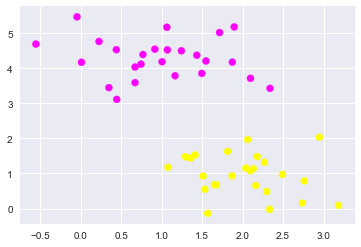

In [15]:
# 制造一些样本
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring');

In [16]:
from sklearn.svm import SVC  # "导入sklearn中的SVC，并初始化
clf = SVC(kernel='linear')
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [17]:
def plot_svc_decision_function(clf, ax=None):
    """画出SVM的边界，划分超平面用实线表示，"""
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([[xi, yj]])
    # plot the margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

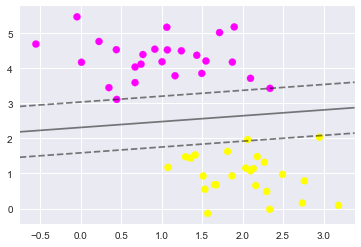

In [18]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf)

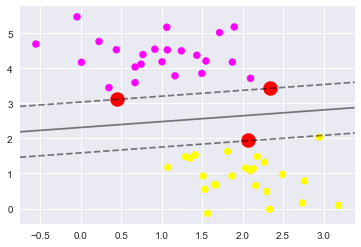

In [19]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
# 支持向量用 大红点标出
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='red');
plot_svc_decision_function(clf)



### 用ipython实现交互  

In [20]:
from ipywidgets import interact

def plot_svm(N=10):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    clf = SVC(kernel='linear')
    clf.fit(X, y)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
    plt.xlim(-1, 4)
    plt.ylim(-1, 6)
    plot_svc_decision_function(clf, plt.gca())
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                s=200, facecolors='red')
    
interact(plot_svm, N=[10,100, 200], kernel='linear');

A Jupyter Widget

## 带核函数的SVM

In [43]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(1000, factor=.1, noise=.1)

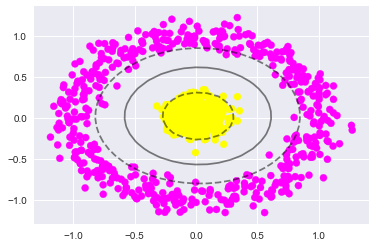

In [44]:
# 这里的kernel可以是  ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable.
#  默认情况下，kernel的选择是'rbf'
clf = SVC(kernel='rbf')
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none');

## 还可以用sklearn自带的包，为SVM模型找到最优超参数

In [70]:
from sklearn.grid_search import GridSearchCV
import pandas as pd

x_t=pd.DataFrame(X,columns=['x1','x2'])
y_t=pd.DataFrame(y,columns=['y'])

candidate = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
parameters = {'C': candidate, 'gamma': candidate}
svc = SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(x_t[['x1', 'x2']], y_t['y'])

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100], 'gamma': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [60]:
import pandas as pd


In [57]:
clf.best_params_

{'C': 0.01, 'gamma': 1}

In [58]:
clf.best_score_

1.0